In [1]:
!pip install fastai


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


importing necessary libraries

In [28]:
from fastai.vision.all import *
from fastai.tabular.all import *
from fastai.collab import *
from fastai.text.all import *
import ipywidgets as widgets

fetching the image datset

In [36]:
path = untar_data(URLs.PETS)/'images'

In [39]:
def is_dog(x): return x[0].islower()

In [40]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_dog, item_tfms=Resize(224))

In [41]:
path.ls()
files = get_image_files(path/"images")

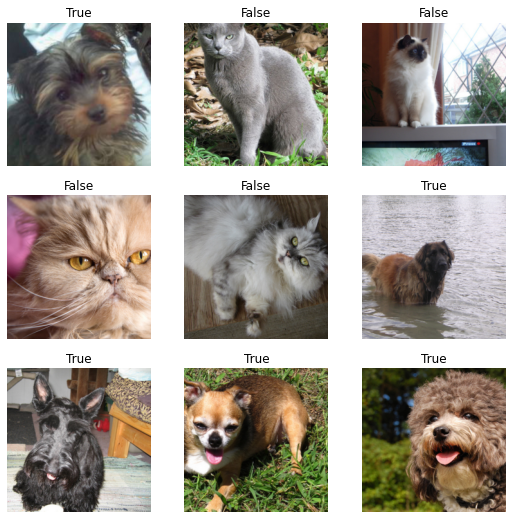

In [42]:
dls.show_batch()

**Creating cnn_learner for image classification**


In [43]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.149340,0.024835,0.006766,01:01


epoch,train_loss,valid_loss,error_rate,time
0,0.065606,0.006720,0.002030,01:01


Results

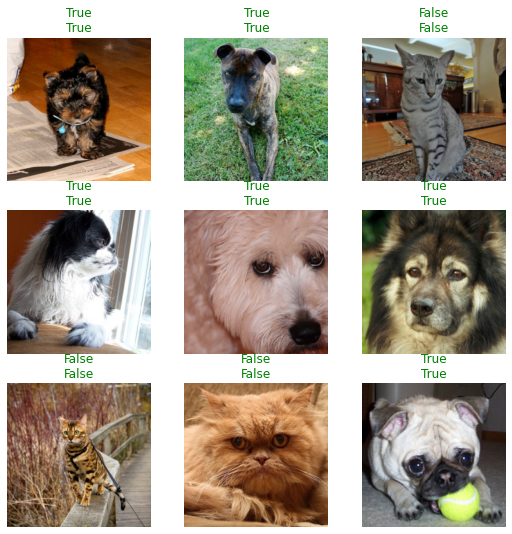

In [44]:
learn.show_results()

In [45]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

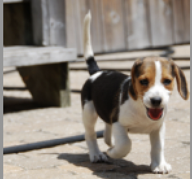

In [46]:
img0 = PILImage.create(uploader.data[0])
img0.to_thumb(192)

In [51]:
is_dog,_,probs = learn.predict("/content/dog.png")
print(f"Is the picture a dog?: {is_dog}.")
print(f"Probability it's a dog: {probs[1].item():.6f}")


Is the picture a dog?: True.
Probability it's a dog: 1.000000


**creating unet_learner for segmentation**

In [9]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

In [10]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.576163,2.337582,00:01


epoch,train_loss,valid_loss,time
0,1.770885,1.498573,00:01
1,1.564188,1.141365,00:01
2,1.474861,1.508407,00:01
3,1.400853,1.003965,00:01
4,1.270693,0.883547,00:01
5,1.156972,0.774149,00:01
6,1.056606,0.759134,00:01
7,0.979053,0.754357,00:01


Results

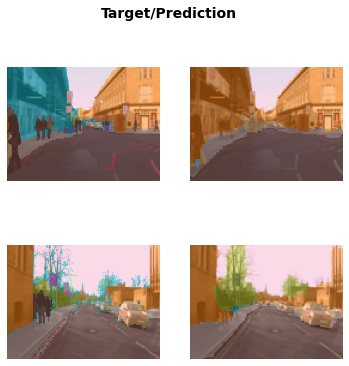

In [11]:
learn.show_results(max_n=2)

**Creating text_classifier_learner for sentiment analysis**

In [12]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')

In [13]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.459842,0.389301,0.828680,03:28


epoch,train_loss,valid_loss,accuracy,time
0,0.299372,0.256644,0.892760,07:06
1,0.250014,0.202578,0.922000,07:05
2,0.193454,0.189159,0.927560,07:05
3,0.145550,0.191896,0.928920,07:05


Results

In [15]:
learn.predict("The movie is good as expected")

('pos', tensor(1), tensor([0.0620, 0.9380]))

In [16]:
learn.predict("With a heartbreaking story brought powerfully to life by Brendan Fraser's starring performance")

('pos', tensor(1), tensor([0.0033, 0.9967]))

**Creating tabular_learner for decisiontree**

In [17]:
path = untar_data(URLs.ADULT_SAMPLE)
dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

In [18]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.385924,0.377945,0.825706,00:04
1,0.356579,0.362526,0.833077,00:04
2,0.346226,0.357375,0.831388,00:03


Results

In [19]:
learn.show_results()

,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary,salary_pred
0,1.0,10.0,5.0,1.0,5.0,2.0,1.0,-0.852419,0.004535,1.143992,0.0,0.0
1,5.0,12.0,3.0,4.0,1.0,5.0,1.0,-0.925924,-0.647515,-0.425764,0.0,0.0
2,5.0,11.0,3.0,11.0,1.0,5.0,1.0,-0.484895,-1.373111,2.321309,1.0,1.0
3,5.0,16.0,5.0,2.0,4.0,5.0,1.0,-1.219944,0.421957,-0.033325,0.0,0.0
4,5.0,12.0,5.0,8.0,5.0,3.0,1.0,0.176650,-0.312803,-0.425764,0.0,0.0
5,7.0,12.0,1.0,4.0,2.0,5.0,1.0,-0.264380,0.052610,-0.425764,0.0,0.0
6,5.0,9.0,3.0,4.0,1.0,5.0,1.0,-0.558399,1.217222,0.359114,1.0,0.0
7,5.0,16.0,5.0,9.0,2.0,5.0,1.0,-1.366954,0.273241,-0.033325,0.0,0.0
8,5.0,9.0,6.0,11.0,4.0,5.0,1.0,-0.117370,0.012783,0.359114,0.0,0.0


**Creating collab_learner for ranking**

In [20]:
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')

In [21]:
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.511115,1.464005,00:00


epoch,train_loss,valid_loss,time
0,1.356478,1.399420,00:00
1,1.252028,1.206215,00:00
2,1.005139,0.893996,00:00
3,0.803948,0.748599,00:00
4,0.689470,0.709567,00:00
5,0.646174,0.696414,00:00
6,0.624261,0.690623,00:00
7,0.614042,0.688365,00:00
8,0.602085,0.687118,00:00
9,0.600407,0.687067,00:00


In [22]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,25.0,61.0,3.0,3.749269
1,16.0,70.0,3.0,3.874327
2,47.0,97.0,4.0,4.207690
3,18.0,63.0,4.0,4.101652
4,74.0,40.0,3.0,3.415523
5,21.0,77.0,4.5,3.692430
6,82.0,79.0,3.0,3.940320
7,17.0,80.0,5.0,4.080873
8,100.0,26.0,3.0,3.998299
